In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
%matplotlib inline

In [2]:
dataset = pd.read_csv('recipes_muffins_cupcakes.csv')

In [3]:
dataset.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [4]:
X = dataset.iloc[:,[1,3]].values
y = dataset.iloc[:,0].values

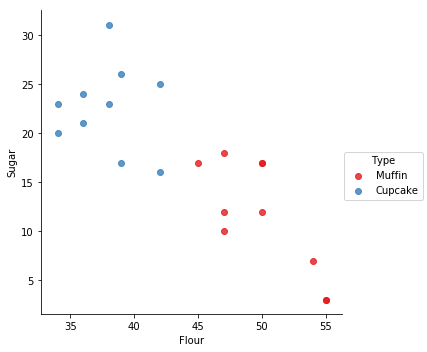

In [5]:
sns.lmplot('Flour','Sugar',dataset,hue='Type',fit_reg=False,palette='Set1')
plt.show()

In [6]:
classifier = SVC(kernel='linear').fit(X,y)

In [7]:
w = classifier.coef_[0]

In [8]:
w

array([  6.66537262e-01,  -4.85266891e-05])

In [9]:
classifier.predict([[50,5]])

array(['Muffin'], dtype=object)

In [10]:
w

array([  6.66537262e-01,  -4.85266891e-05])

In [11]:
classifier.intercept_

array([-28.99349742])

In [12]:
classifier.support_vectors_

array([[ 42.,  16.],
       [ 42.,  25.],
       [ 45.,  17.]])

In [28]:
a = -w[0]/w[1]
xx = np.linspace(30, 60)
yy = a * xx - (classifier.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = classifier.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = classifier.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

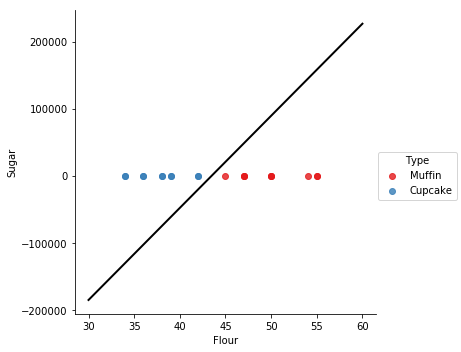

In [29]:
sns.lmplot('Flour', 'Sugar', data=dataset, hue='Type', 
           palette='Set1', fit_reg=False)
plt.plot(xx, yy, linewidth=2, color='black')

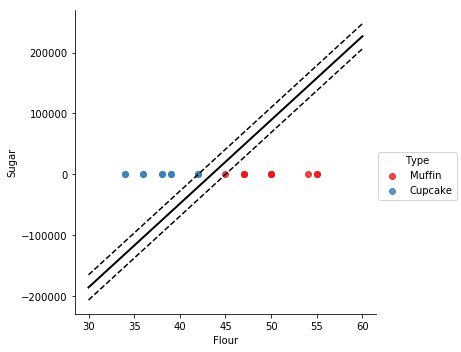

In [30]:
sns.lmplot('Flour', 'Sugar', data=dataset, hue='Type', 
           palette='Set1', fit_reg=False)
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1],
            s=80, facecolors='none')